In [16]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data/log2.csv')

In [17]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


We know that Ports are categorical variables: 

In [18]:
# convert features with "port" in the name into categorical variables

for feature in data: 
    if "Port" in feature:
        data[feature] = data[feature].astype('category')

# data = [data[feature] == data[feature].astype('category') if "port" in feature else data[feature] == data[feature] for feature in data]

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded = enc.fit_transform(data.drop('Action', axis=1), data['Action'])

Encoded is now a sparse matrix of our data with all the ports as one hot encoded columns.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded, data['Action'], test_size=0.2, random_state=42)

# Linear Support Vector Machine (SVM) Classifier

In [21]:
from sklearn.svm import LinearSVC

clf = LinearSVC(dual = True) #C = 1 is the default
model = clf.fit(X_train, y_train)

In [22]:
preds = model.predict(X_test)

<Figure size 800x600 with 0 Axes>

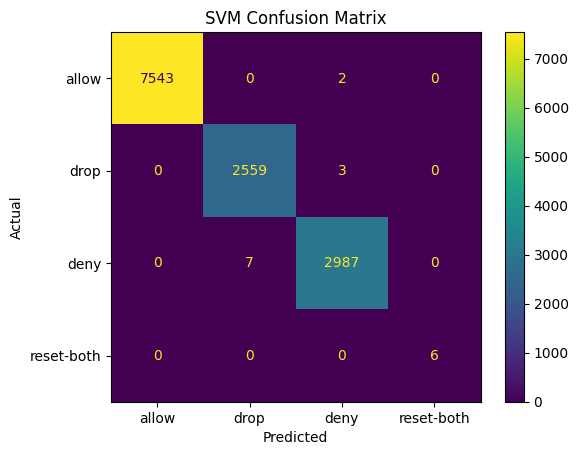

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      1.00      1.00         6

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107



In [23]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = data['Action'].unique().tolist()
#matrix = confusion_matrix(y_test, preds, labels = labels)
plt.figure(figsize=(8, 6))
#sns.heatmap(matrix, annot=True, fmt="d")

ConfusionMatrixDisplay.from_predictions(y_test, preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

print(classification_report(y_test, preds))

In [24]:
data["Action"].unique().tolist()

['allow', 'drop', 'deny', 'reset-both']

## Grid Searched SVM with no CV:

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(LinearSVC(dual = True, max_iter=1200), param_grid, refit = True, verbose = 3, cv=None)

grid.fit(encoded, data['Action'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.999 total time=   0.2s
[CV 2/5] END .............................C=0.1;, score=0.999 total time=   0.2s
[CV 3/5] END .............................C=0.1;, score=0.998 total time=   0.2s
[CV 4/5] END .............................C=0.1;, score=0.998 total time=   0.1s
[CV 5/5] END .............................C=0.1;, score=0.998 total time=   0.2s
[CV 1/5] END ...............................C=1;, score=0.999 total time=   1.0s
[CV 2/5] END ...............................C=1;, score=0.999 total time=   1.0s
[CV 3/5] END ...............................C=1;, score=0.998 total time=   1.0s
[CV 4/5] END ...............................C=1;, score=0.998 total time=   0.9s
[CV 5/5] END ...............................C=1;, score=0.998 total time=   0.9s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..............................C=10;, score=0.999 total time=   4.3s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..............................C=10;, score=0.999 total time=   5.0s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..............................C=10;, score=0.998 total time=   5.2s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..............................C=10;, score=0.998 total time=   4.1s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..............................C=10;, score=0.998 total time=   4.3s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .............................C=100;, score=0.999 total time=   6.4s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .............................C=100;, score=0.999 total time=   6.3s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .............................C=100;, score=0.999 total time=   5.5s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .............................C=100;, score=0.998 total time=   7.5s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .............................C=100;, score=0.998 total time=   6.1s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ............................C=1000;, score=0.999 total time=   5.9s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ............................C=1000;, score=0.999 total time=   5.7s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ............................C=1000;, score=0.999 total time=   5.5s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ............................C=1000;, score=0.998 total time=   6.4s


C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ............................C=1000;, score=0.998 total time=   4.9s


GridSearchCV(estimator=LinearSVC(dual=True, max_iter=1200),
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, verbose=3)

In [26]:
print('Best C:', grid.best_estimator_.get_params()['C'])

Best C: 1


In [27]:
clf = LinearSVC(dual = True) #C = 1 is the default
model = clf.fit(encoded, data['Action'])
preds = model.predict(encoded)

<Figure size 800x600 with 0 Axes>

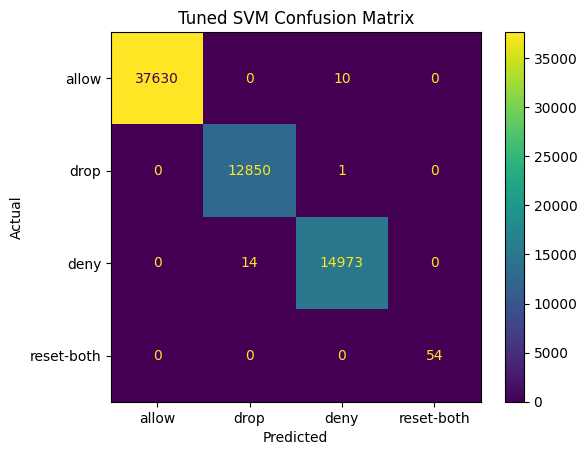

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     37640
        deny       1.00      1.00      1.00     14987
        drop       1.00      1.00      1.00     12851
  reset-both       1.00      1.00      1.00        54

    accuracy                           1.00     65532
   macro avg       1.00      1.00      1.00     65532
weighted avg       1.00      1.00      1.00     65532



In [28]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = data['Action'].unique().tolist()
#matrix = confusion_matrix(y_test, preds, labels = labels)
plt.figure(figsize=(8, 6))
#sns.heatmap(matrix, annot=True, fmt="d")

ConfusionMatrixDisplay.from_predictions(data['Action'], preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned SVM Confusion Matrix")
plt.show()

print(classification_report(data['Action'], preds))

# Stochiastic Gradient Descent: 

In [42]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
model = clf.fit(X_train, y_train)

preds = model.predict(X_test)

C:\Users\Abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

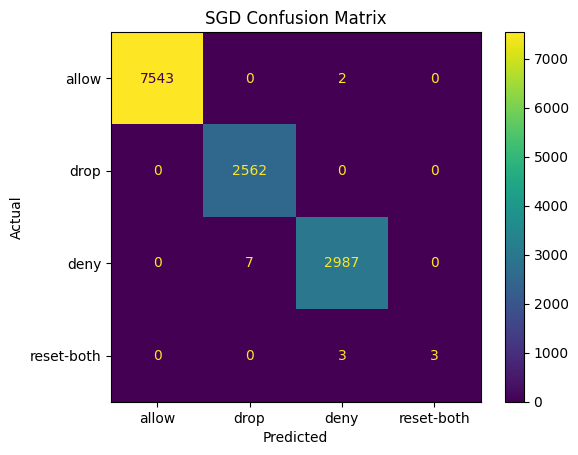

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.50      0.67         6

    accuracy                           1.00     13107
   macro avg       1.00      0.87      0.92     13107
weighted avg       1.00      1.00      1.00     13107



In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = data['Action'].unique().tolist()
#matrix = confusion_matrix(y_test, preds, labels = labels)
plt.figure(figsize=(8, 6))
#sns.heatmap(matrix, annot=True, fmt="d")

ConfusionMatrixDisplay.from_predictions(y_test, preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SGD Confusion Matrix")
plt.show()

print(classification_report(y_test, preds))

## Grid Searched SGD with no CV:

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SGDClassifier(loss="hinge", penalty="l2", max_iter=100, early_stopping=True),
                     param_grid, refit = True, verbose = 3, cv=None)

In [46]:
grid.fit(encoded, data['Action'])

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......................alpha=1e-06;, score=0.999 total time=   0.1s
[CV 2/5] END .......................alpha=1e-06;, score=0.999 total time=   0.1s
[CV 3/5] END .......................alpha=1e-06;, score=0.998 total time=   0.1s
[CV 4/5] END .......................alpha=1e-06;, score=0.998 total time=   0.1s
[CV 5/5] END .......................alpha=1e-06;, score=0.998 total time=   0.1s
[CV 1/5] END .......................alpha=1e-05;, score=0.999 total time=   0.1s
[CV 2/5] END .......................alpha=1e-05;, score=0.999 total time=   0.1s
[CV 3/5] END .......................alpha=1e-05;, score=0.998 total time=   0.1s
[CV 4/5] END .......................alpha=1e-05;, score=0.998 total time=   0.1s
[CV 5/5] END .......................alpha=1e-05;, score=0.998 total time=   0.1s
[CV 1/5] END ......................alpha=0.0001;, score=0.999 total time=   0.1s
[CV 2/5] END ......................alpha=0.0001;,

GridSearchCV(estimator=SGDClassifier(early_stopping=True, max_iter=100),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             verbose=3)

In [47]:
print('Best alpha:', grid.best_estimator_.get_params()['alpha'])

Best alpha: 1e-06


In [48]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=100,
                    alpha = grid.best_estimator_.get_params()['alpha'], early_stopping=True)

model = sgd.fit(encoded, data['Action'])

preds = model.predict(encoded)

<Figure size 800x600 with 0 Axes>

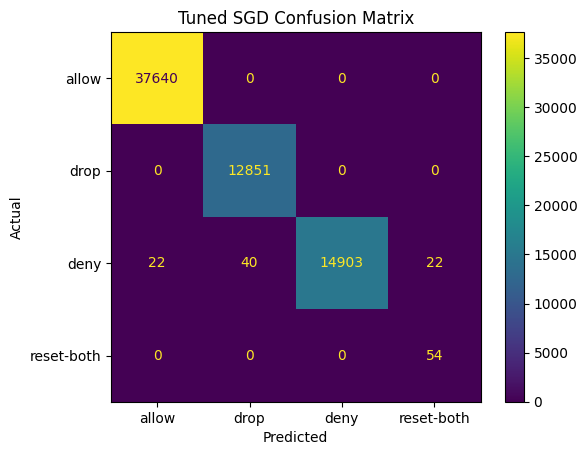

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     37640
        deny       1.00      0.99      1.00     14987
        drop       1.00      1.00      1.00     12851
  reset-both       0.71      1.00      0.83        54

    accuracy                           1.00     65532
   macro avg       0.93      1.00      0.96     65532
weighted avg       1.00      1.00      1.00     65532



In [49]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = data['Action'].unique().tolist()
#matrix = confusion_matrix(y_test, preds, labels = labels)
plt.figure(figsize=(8, 6))
#sns.heatmap(matrix, annot=True, fmt="d")

ConfusionMatrixDisplay.from_predictions(data['Action'], preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned SGD Confusion Matrix")
plt.show()

print(classification_report(data['Action'], preds))

## Grid Searched SGD with External CV: 

In [53]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, alpha = grid.best_estimator_.get_params()['alpha'], early_stopping=True)

model = sgd.fit(X_train, y_train)

<Figure size 800x600 with 0 Axes>

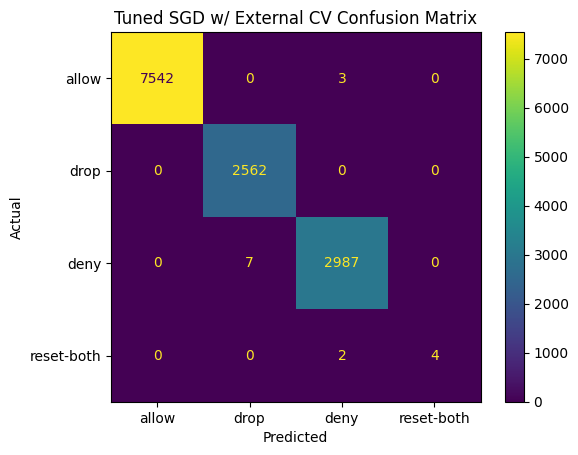

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107



In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

preds = model.predict(X_test)

plt.figure(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(y_test, preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned SGD w/ External CV Confusion Matrix")
plt.show()

print(classification_report(y_test, preds))